# _Problem Statement_
- Use decision trees to prepare a model on fraud data 
- treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
fraudC=pd.read_csv("Fraud_check.csv")
fraudC

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraudC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraudC.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraudC.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [6]:
fraudC.duplicated().value_counts()

False    600
dtype: int64

In [7]:
fraudC["Undergrad"].unique()

array(['NO', 'YES'], dtype=object)

In [8]:
fraudC["Urban"].unique()

array(['YES', 'NO'], dtype=object)

In [9]:
fraudC["Marital.Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [10]:
list(fraudC.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [11]:
fraudC.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [12]:
y1=np.empty(600, dtype=object)
i=0

for value in fraudC['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1    

In [13]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [14]:
f_t=pd.DataFrame(y1,columns=["Target"])
f_t

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [15]:
fraudC=pd.concat([fraudC,f_t],axis=1)
fraudC

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [16]:
fraudC.drop('Taxable.Income',inplace=True,axis=1)

In [17]:
fraudC.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Target
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [18]:
fraudC['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [19]:
fraudC['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [20]:
fraudC['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [21]:
fraudC.groupby(['Urban', 'Target', 'Undergrad', 'Marital.Status']).count()

City.Population  Work.Experience
Urban Target Undergrad Marital.Status                                  
NO    Good   NO        Divorced                     43               43
                       Married                      37               37
                       Single                       34               34
             YES       Divorced                     41               41
                       Married                      37               37
                       Single                       45               45
      Risky  NO        Divorced                     10               10
                       Married                       7                7
                       Single                       12               12
             YES       Divorced                      9                9
                       Married                      13               13
                       Single                       10               10
YES   Good   NO        Divorced                     37               37
                       Married                      35               35
                       Single                       44               44
             YES       Divorced                     32               32
                       Married                      40               40
                       Single                       51               51
      Risky  NO        Divorced                      7                7
                       Married                      12               12
                       Single                       10               10
             YES       Divorced                     10               10
                       Married                      13               13
                       Single                       11               11

In [22]:
fraudC['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [23]:
en = LabelEncoder()
fraudC['Undergrad']= en.fit_transform(fraudC['Undergrad'])
fraudC['Marital.Status']= en.fit_transform(fraudC['Marital.Status'])
fraudC['Urban']= en.fit_transform(fraudC['Urban'])
fraudC['Target']= en.fit_transform(fraudC['Target'])

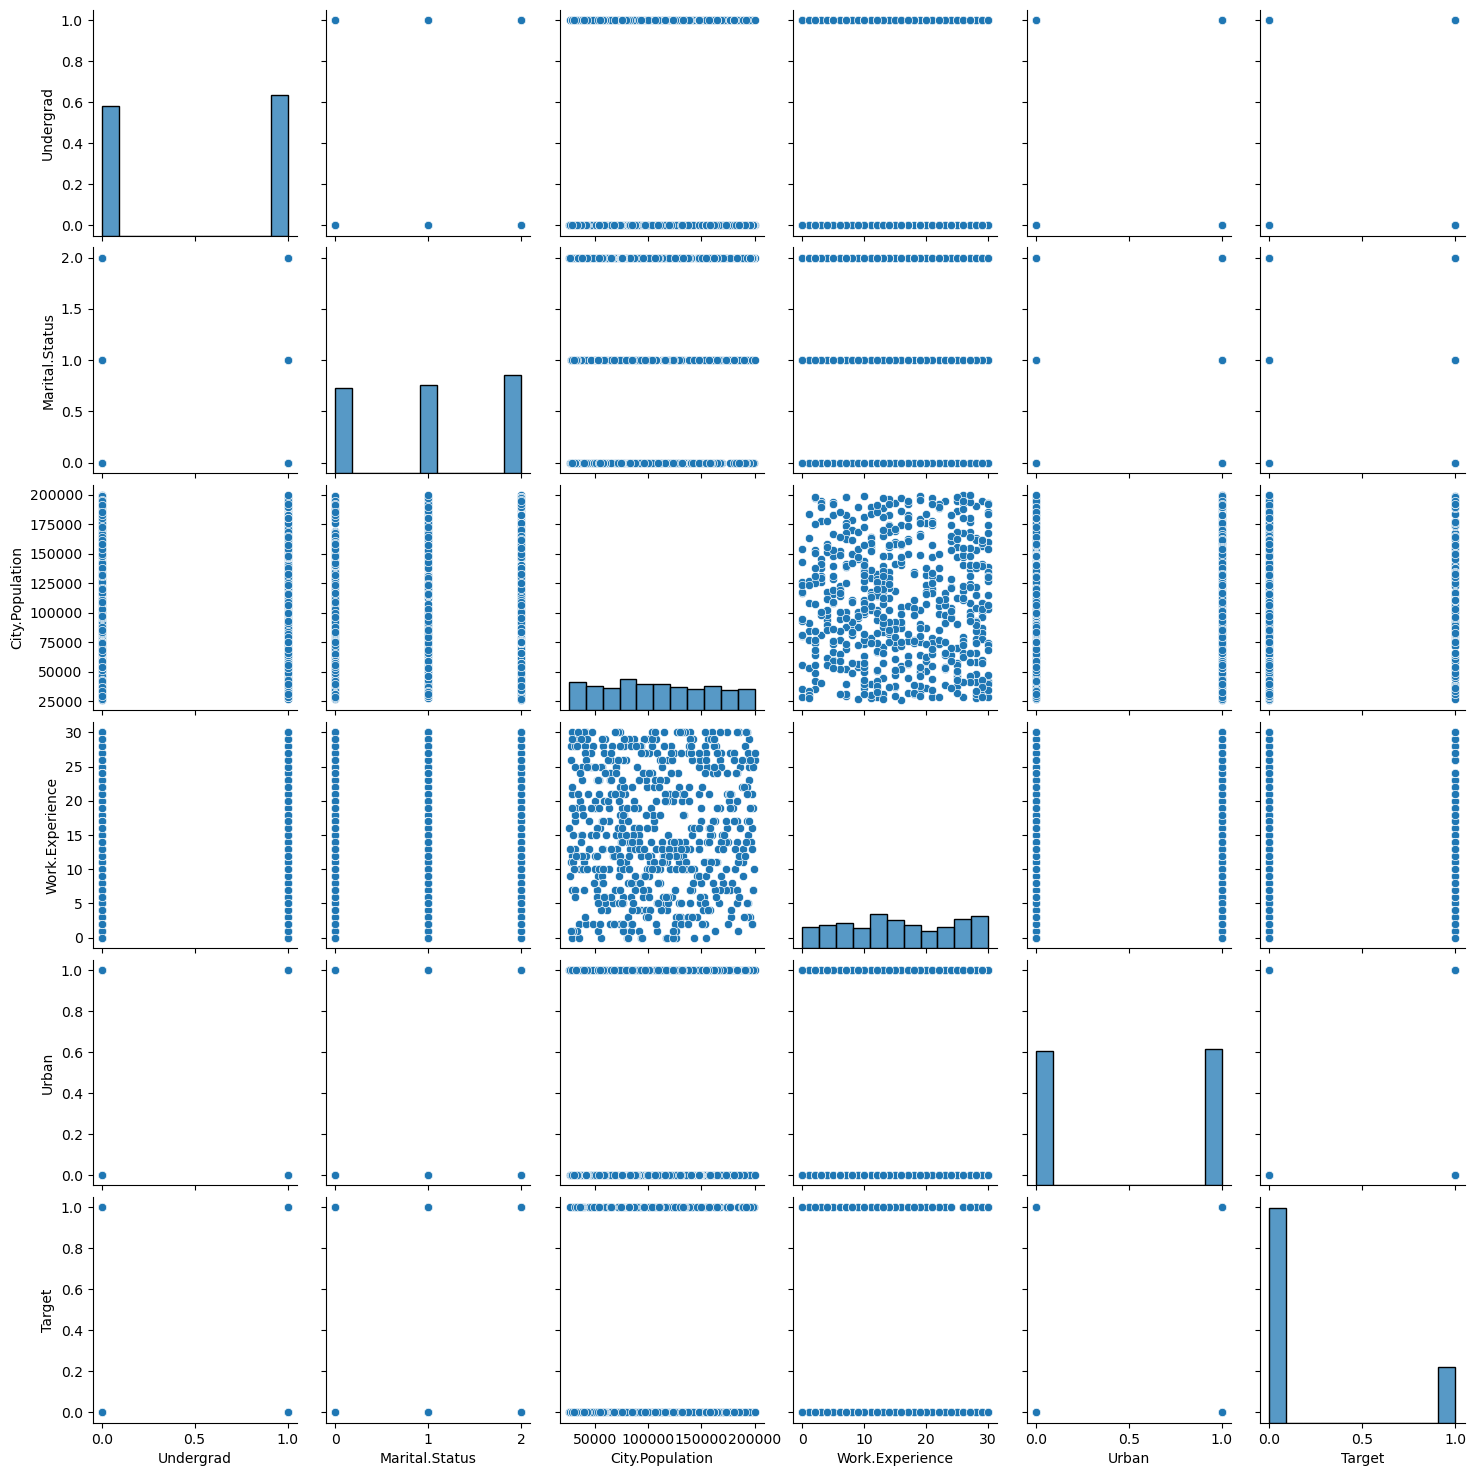

In [24]:
# Visualization
sns.pairplot(fraudC)

<Axes: >

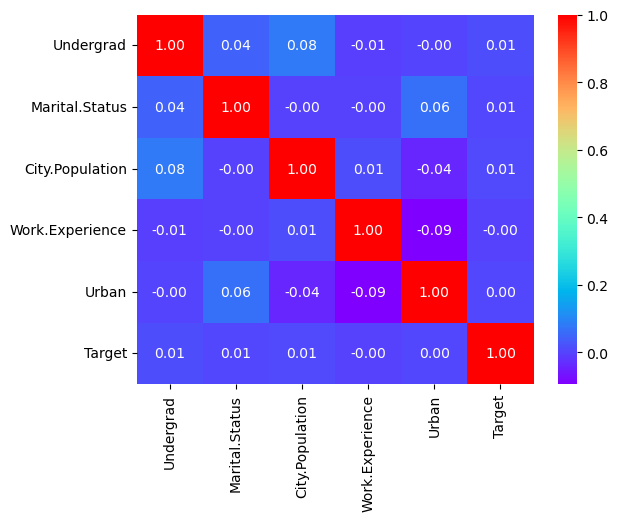

In [25]:
sns.heatmap(fraudC.corr(), cmap='rainbow', annot=True, fmt=".2f")

<Axes: xlabel='City.Population', ylabel='Density'>

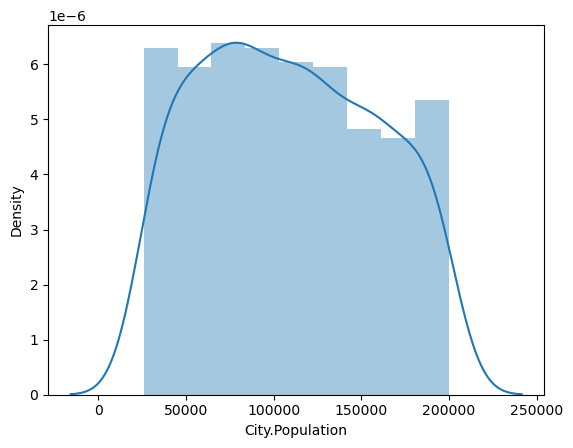

In [26]:
sns.distplot(fraudC['City.Population'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

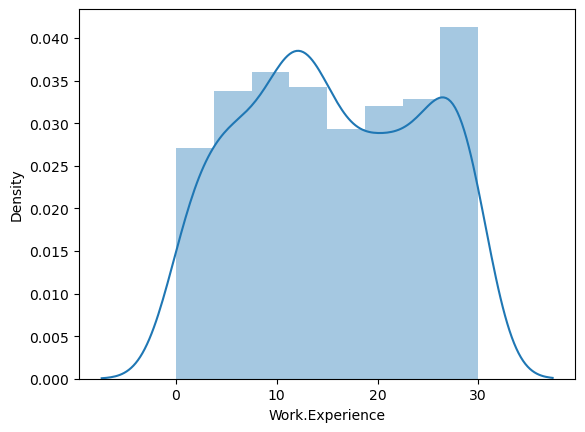

In [27]:
sns.distplot(fraudC['Work.Experience'])

<Axes: xlabel='City.Population', ylabel='Work.Experience'>

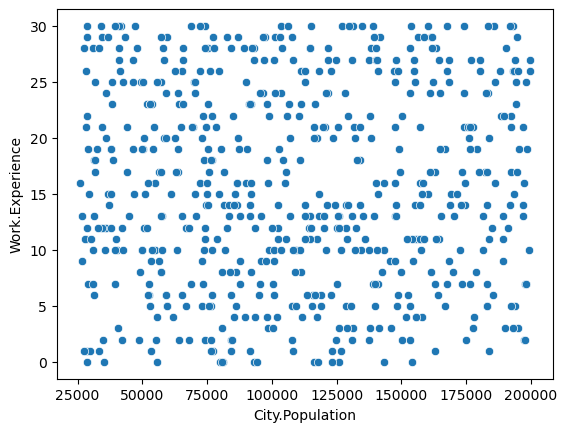

In [28]:
sns.scatterplot(x = 'City.Population', y = 'Work.Experience', data = fraudC)

In [29]:
x=fraudC.iloc[:,0:5]
y=fraudC['Target']
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [30]:
#Train Test Split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
xtrain

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
118,0,0,199174,10,0
362,1,0,75552,17,1
55,1,2,89965,16,1
90,0,0,101232,29,0
390,1,2,57324,17,0
...,...,...,...,...,...
277,0,0,117364,11,0
9,1,0,155482,4,1
359,1,2,157299,11,0
192,1,1,126556,10,1


In [32]:
ytrain

118    1
362    1
55     1
90     0
390    0
      ..
277    0
9      0
359    0
192    0
559    0
Name: Target, Length: 480, dtype: int32

# DecisionTreeClassifier Using Gini Criteria

In [33]:
## Hyperparameter Tunning
parameter={
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12,15,18]
    
}

In [34]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5)

In [35]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15,
                                       18],
                         'splitter': ['best', 'random']})

In [36]:
ypred=grid.predict(xtest)

In [37]:
grid.best_params_

{'max_depth': 1, 'splitter': 'random'}

In [38]:
grid.best_score_

0.79375

In [39]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, splitter='random')

In [40]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [41]:
confusion_matrix(ytest,ypred)

array([[95,  0],
       [25,  0]], dtype=int64)

In [42]:
pred_train = dt.predict(xtrain)

In [43]:
confusion_matrix(ytrain,pred_train)

array([[381,   0],
       [ 99,   0]], dtype=int64)

In [44]:
accuracy_score(ytrain,pred_train)

0.79375

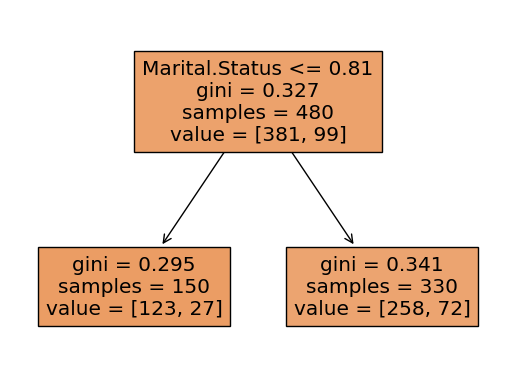

In [45]:
tree.plot_tree(dt, feature_names=x.columns,filled=True)
plt.show()

## Decision Tree Classifier using Entropy Criteria

In [46]:
## Hyperparameter Tunning
parameter={
 'criterion':['entropy','gini'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12,15,18]
    
}


In [47]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5)

In [48]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15,
                                       18],
                         'splitter': ['best', 'random']})

In [49]:
ypred=grid.predict(xtest)

In [50]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'splitter': 'best'}

In [51]:
grid.best_score_

0.79375

In [66]:
# Post Prunning
dt = DecisionTreeClassifier(criterion='entropy', max_depth=1, splitter='best')

In [67]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [68]:
confusion_matrix(ytest,ypred)

array([[95,  0],
       [25,  0]], dtype=int64)

In [69]:
pred_train = dt.predict(xtrain)

In [70]:
confusion_matrix(ytrain,pred_train)

array([[381,   0],
       [ 99,   0]], dtype=int64)

In [71]:
accuracy_score(ytrain,pred_train)

0.79375

In [72]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250

In [73]:
print("Training Accuracy:", dt.score(xtrain,ytrain))
print("Testing Accuracy:" ,dt.score(xtest,ytest))

Training Accuracy: 0.79375
Testing Accuracy: 0.7916666666666666


In [74]:
fraudC1=pd.read_csv(r"Fraud_check.csv")
fraudC1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [75]:
y2=np.empty(600, dtype=object)
i=0

for value in fraudC1['Taxable.Income']:
    if value<=30000:
        y2[i]='Risky'
    else:
        y2[i]='Good'
    i=i+1    

In [76]:
f_t2=pd.DataFrame(y2,columns=["Target"])


In [77]:
fraudC1=pd.concat([fraudC1,f_t2],axis=1)

In [78]:
fraudC1.drop('Taxable.Income',inplace=True,axis=1)

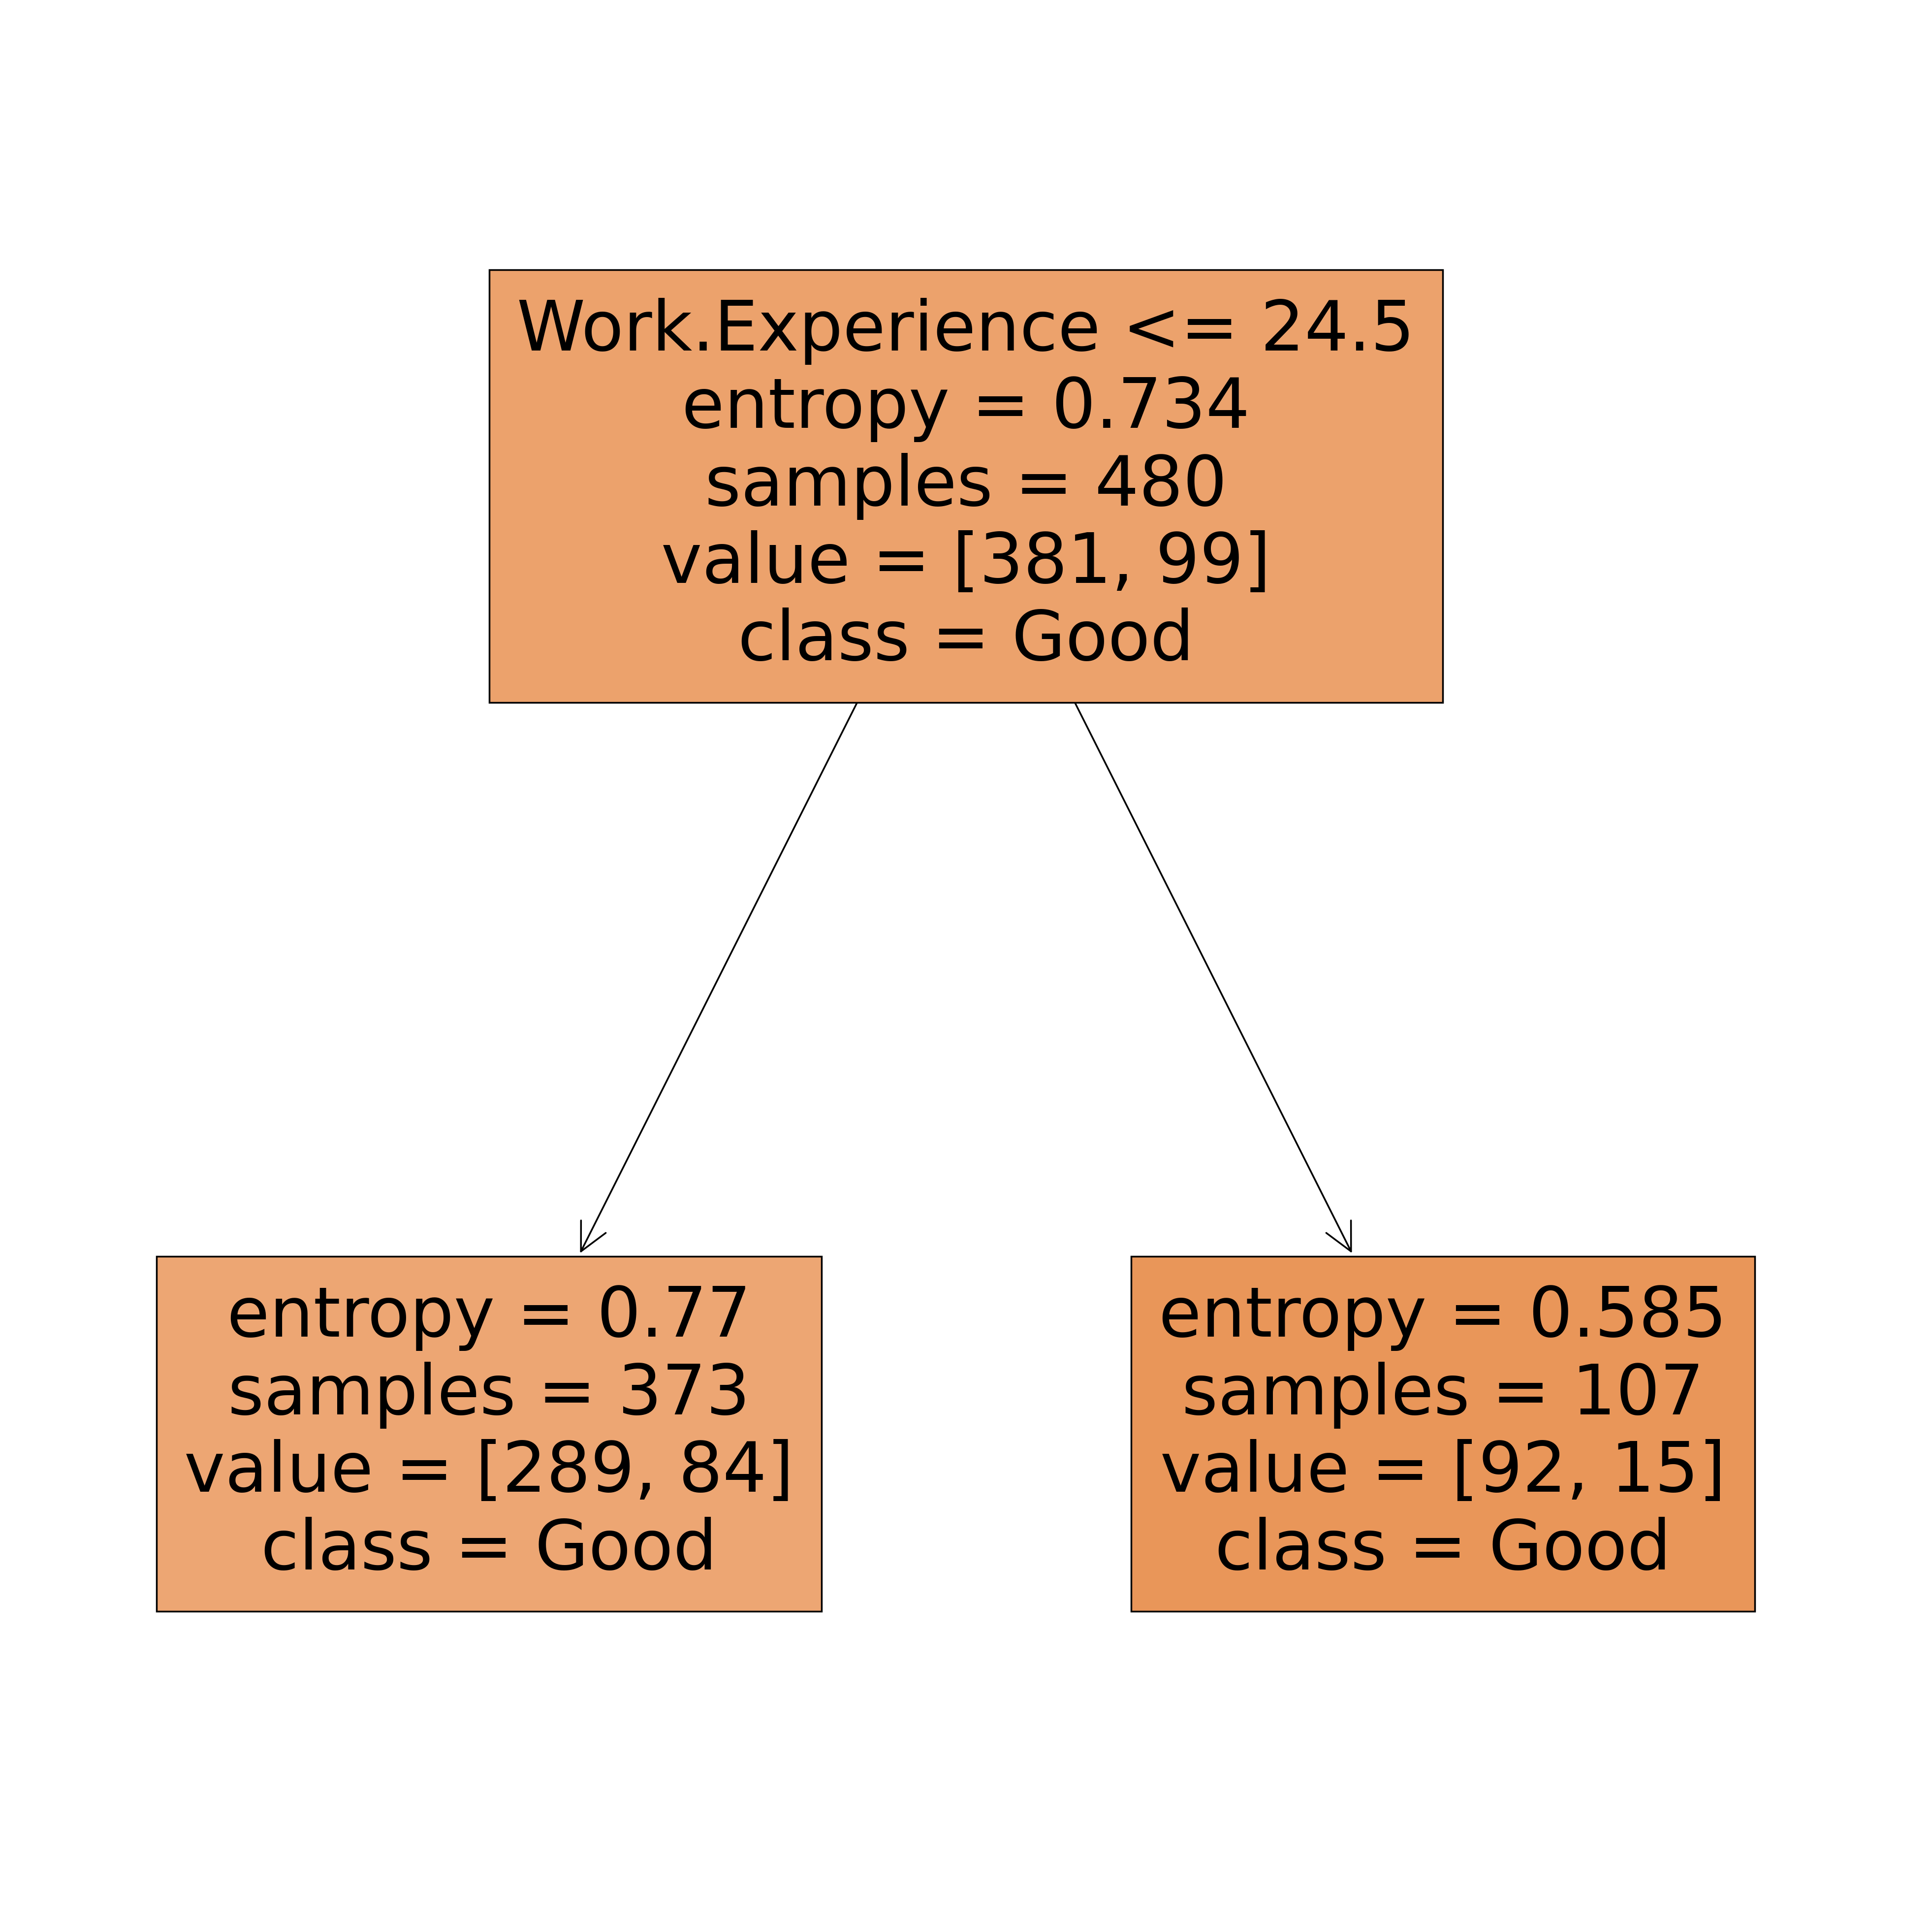

In [79]:
tree.plot_tree(dt, feature_names=x.columns, 
               class_names=fraudC1['Target'].unique(),
              filled=True)
plt.show()